# Градиентный бустинг

### Чтение данных

In [1]:
from notebooks.src.pipelines import DataPipeline

In [14]:
data = DataPipeline()
data(add_pollution=False, n_splits=1, random_seed=1)

### Модели

In [15]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from src.preprocessor import DataType, TargetType
from src.models.sklearn import SklearnModel
from notebooks.src.ensemble import ModelsEnsemble
from notebooks.src.experiment import Experiment
from imblearn.over_sampling import SMOTE

In [16]:
train_numpy_data, test_numpy_data = data.preprocess(
    data_type=DataType.NUMPY, train_balance=SMOTE()
)

### Влияние количества деревьев

In [17]:
experiment_n_estimators = Experiment(name="gradient_boosting_n_estimators")

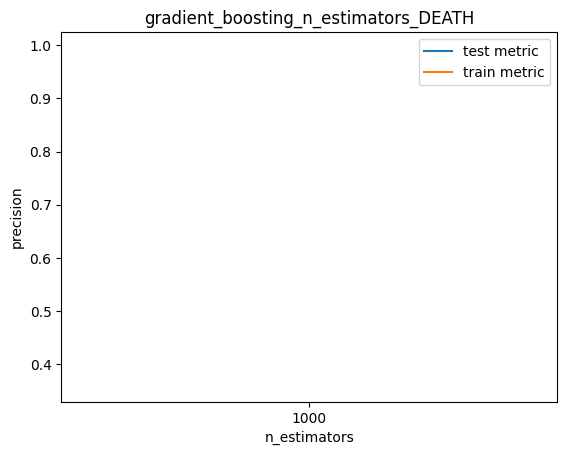

In [19]:
__list = list(range(1000, 1001, 1))
__depth = 5
experiment_n_estimators.model_ensemble(
    ensemble=ModelsEnsemble.from_parameters(
        model_class=SklearnModel,
        constructor_class={TargetType.DEATH: GradientBoostingClassifier},
        parameters={
            TargetType.DEATH: {"n_estimators": __list},
        },
    ),
    train_data=train_numpy_data,
    test_data=test_numpy_data,
    metric_map=lambda metric: metric.precision,
    x=__list,
    xlabel="n_estimators",
    ylabel="precision",
    n_jobs=16,
)

In [7]:
experiment_n_estimators.model_ensemble(
    ensemble=ModelsEnsemble.from_parameters(
        model_class=SklearnModel,
        constructor_class={TargetType.STAY: GradientBoostingRegressor},
        parameters={
            TargetType.STAY: {
                "n_estimators": [1, 5, 10, 50, 100],
                "max_depth": [5] * 5,
            },
        },
    ),
    train_data=train_numpy_data,
    test_data=test_numpy_data,
    metric_map=lambda metric: metric.r2,
    x=[1, 5, 10, 50, 100],
    xlabel="n_estimators",
    ylabel="r2",
    n_jobs=16,
)

NotImplementedError: 

### Влияние глубины дерева

In [7]:
experiment_max_depth = Experiment(name="gradient_boosting_max_depth")

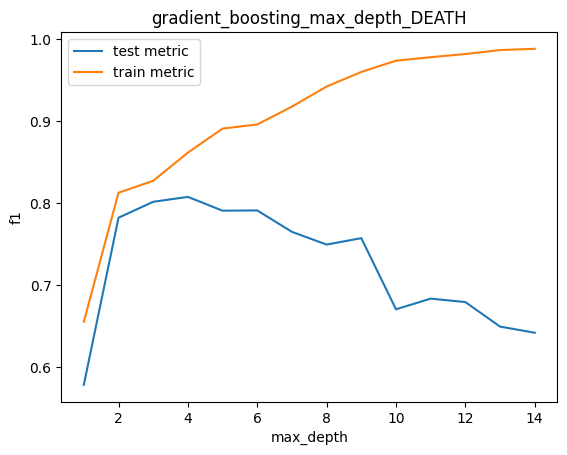

In [8]:
__list = list(range(1, 15))
__n_estimators = 3
experiment_max_depth.model_ensemble(
    ensemble=ModelsEnsemble.from_parameters(
        model_class=SklearnModel,
        constructor_class={TargetType.DEATH: GradientBoostingClassifier},
        parameters={
            TargetType.DEATH: {
                "n_estimators": [__n_estimators] * len(__list),
                "max_depth": __list,
            },
        },
    ),
    train_data=train_numpy_data,
    test_data=test_numpy_data,
    metric_map=lambda metric: metric.f1,
    x=__list,
    xlabel="max_depth",
    ylabel="f1",
    n_jobs=16,
)

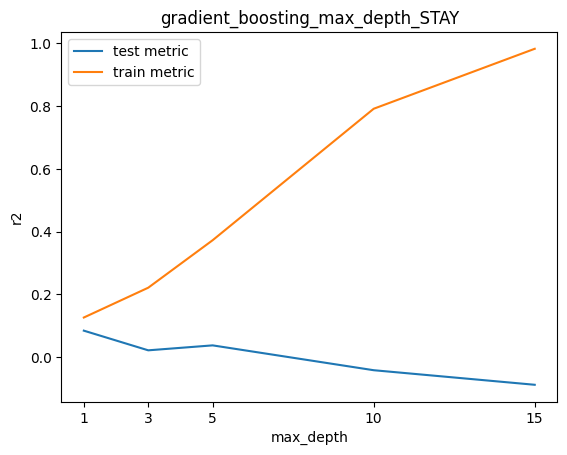

In [10]:
experiment_max_depth.model_ensemble(
    ensemble=ModelsEnsemble.from_parameters(
        model_class=SklearnModel,
        constructor_class={TargetType.STAY: GradientBoostingRegressor},
        parameters={
            TargetType.STAY: {
                "n_estimators": [50] * 5,
                "max_depth": [1, 3, 5, 10, 15],
            },
        },
    ),
    train_data=train_numpy_data,
    test_data=test_numpy_data,
    metric_map=lambda metric: metric.r2,
    x=[1, 3, 5, 10, 15],
    xlabel="max_depth",
    ylabel="r2",
)